<a href="https://colab.research.google.com/github/mayafajardob/AEA1/blob/master/assignment_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [0]:
NAME = "Is there a gender education gap in Colombia? A socioeconomic analysis from Saber 11 test results."
COLLABORATORS = "Marina Diez, Maria Fajardo"

---

# Is there a gender education gap in Colombia? A socioeconomic analysis from Saber 11 test results.

|Name|SNR|UNR|
|----|---|----|
|Marina Diez|2006191|u618360|
|Maria Fajardo|2045454|u484321|

# Research question

This project will test for the existence of a gender gap in school performance at the nationwide standarized *Saber 11* test in Colombia. Particularly, this project is inspired in a previous study developed by Abadía and Bernal (2016), “*Gender Gaps in School Performance Through the Score Distribution: Evidence of the Saber 11 Test.*”, which tested for the gap for the year 2014 cohort. The present project will update said study and test for the gap for the year 2019 cohort. Additionally, it will explore whether the gap varies among students on different quartiles of the sample. 


# Motivation

In 2010, the Colombian Government, along with the Ministry of Education, created the Ten-Year Education Plan, in which they stablished that Colombia would be the best educated country in Latin America by 2025. Being the best educated country not only implies an increase in educational assessments scores, but also equal opportunities for all members of the educational system.

Thus, one of its main goals was to ensure an equal access to higher education between girls and boys. In Colombia, access to higher education is partially based on Saber 11 results. Thus, a way to guarantee gender equality on higher education access could be via school performance on this test. Additionally, the abatement of gender differences at school levels could lead to a more equal access and success in the labour market in future years. In turn, women could have access to higher wages and achieve a higher economic status. All of them, contribute to the achievement of international goals of gender equality. 

By means of this project, we aim to contribute to the short literature about the variables that affect the gender education gap. More specifically, the present project will answer the following questions:

  - Does a gender education gap exist in school performance among students in Colombia?

  - If so: 
      -  Does it vary with  personal, familiar or scholar student's characteristics? 
      - How does the gap behave along the score's distribution?

# Method

This project is divided in two parts. First, we show a descriptive analysis of the data of interest by finding its main indicators and analysing its distribution. Second we statically find the gender education gap and perform a regression analysis. We based our analysis on two linear models: a simple OLS regression and a Quantil regression (QR). 

# Preview of the answers

- The results obtained indicate that there is an academic gap between boys and girls with similar socioeconomic conditions in Global, Reading, Math and Science scores, and that those differences expand as the scores increase.
- Socioeconomic, familiar and school characteristics have been found to explain part of this variation.





# Main assumptions

First, we base our regression analysis on the education production function from Hanushek (1979). We follow Abadía and Bernal (2016) on this matter. This specification considers as inputs student’s attributes, familiar characteristics and school resources. Meanwhile, the output is defined as student’s performance. Given our data, we have chosen four different outcome variables based on four different scores: Global, Reading, Math and Science scores on Saber 11 test. 

Second,  we need to assume the classical regression assumptions: 
  
- The regression model is linear in the coefficients and the error term.  
- All independent variables are uncorrelated with the error term. 
- The error term is well behaved i.e. it has a mean of zero and a constant variance.
- Observations of the error term are uncorrelated with each other
- No independent variable is a perfect linear funcion of other explanatory variables



#Data

This study makes use of the data on results of the 2019 application of “*Saber 11*”, a nationwide standardized test done by last year high school students in Colombia. The test contains both a cognitive and a contextual questionnaire. In the first one, students are asked for their knowledge in Reading, Math, Science, Social and Citizenship and English. The contextual part, ask the students about other personal, familiar and scholar characteristics. For the purpose of this project, we are using the reading, math and science scores, along with some of the variables of the contextual questionnaire.
 

The test is administered by the Colombian Institute for Evaluation of Education - Icfes. The database can be found and downloaded on their webpage. It can also be found on our repository (INSERT LINK)
Among all the variables available on the original database, we have only made use of some variables of interest which consist of the final database. They can be divided into the 3 previously mentioned groups:
 
1.	Personal characteristics variables:

  a.	Global Score: weighted average of the subjects asked in the contextual questionnaire.
  
  b.	Scores on Reading, Math and Science
  
  c.	Sex 

  d.	Year of birth 
2.	Familiar characteristics variables: 

  a.	Parents level of education

  b.	Family Stratum
3.	Scholar characteristics variables: 

  a.	School Area

  b.	School Funding







### **PREPARE THE WORKING ENVIRONMENT**

First, we load and read the database and import the libreries needed.


In [0]:
#Connect Google Drive (on when on Google Collab)
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Unzip database from GitHub Repo (on when on Jupyter Lab)

import zipfile
with zipfile.ZipFile('Saber_11__2019-2.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [0]:
#General libraries
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import ttest_ind
from scipy.special import stdtr
#import html5lib

#Regression libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [0]:
#Read Data Base from Google Drive
#s11_20192 = pd.read_csv('drive/My Drive/AEA1/Data/Saber_11__2019-2.csv', sep = ',')

#Read Database from repo
s11_20192 = pd.read_csv('Saber_11__2019-2.csv', sep = ',')
#s11_20192.head(1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### **PREPARE THE DATA**

The original data base contains the information of 546.212 students and 82 variables for each one of them. As this database has many variables and goes beyond the scope of this project, we extract and prepare the variables of interest for the present project, and we create a new database with such observations.  

Thus, the function `get_data_into_shape` does the following:

1. Translate from Spanish to English the name of the variables of interest
2. Create a dataframe containing only the variables of interest
3. Standarize the codification of missing values to `np.nan`: NaN
4. Set the following variables into a category:
- Student gender: `stuSex`
- Father and Mother level of education: `famFatherEduc` and `famMotherEduc`
- Family stratum: `famHomeStratum`
- School funding: `schoolFunding`
- School area: `schoolArea`
5. Set the variable `stuDateOfBirth` as string so that we could find the age of the student `stuAge` in a next chunk.
6. Set the variables of the assessment score percentiles (`stuGlobalScorePErcentile`, `readingScorePercentile`, `mathScorePercentile` and `scienceScorePercentile`) as float in order to create new variables with quartiles for the quantile regression.
7. Finally, the function returns this new dataframe.

In [0]:
#Number of observations
print('Number of observations:',s11_20192.shape[0])
print('Number of variables:',s11_20192.shape[1])

Number of observations: 546212
Number of variables: 82


In [0]:
#Getting data into shape
def get_data_into_shape(df):
    df = df.rename({
      #Personal characteristics
      'ESTU_GENERO' : 'stuSex',
      'ESTU_FECHANACIMIENTO' : 'stuDateOfBirth',
      'PUNT_GLOBAL': 'stuGlobalScore',
      'PERCENTIL_GLOBAL': 'globalPercentile',
      'PUNT_LECTURA_CRITICA': 'readingScore',
      'PERCENTIL_LECTURA_CRITICA' : 'readingPercentile',
      'PUNT_MATEMATICAS':'mathScore',
      'PERCENTIL_MATEMATICAS' : 'mathPercentile',
      'PUNT_C_NATURALES':'scienceScore',
      'PERCENTIL_C_NATURALES' : 'sciencePercentile',
       
      #Family characteristics
      'FAMI_EDUCACIONPADRE': 'famFatherEduc',
      'FAMI_EDUCACIONMADRE': 'famMotherEduc',
      'FAMI_ESTRATOVIVIENDA': 'famHomeStratum',

      #School characteristics
      'COLE_NATURALEZA' : 'schoolFunding',
      'COLE_CALENDARIO' : 'schoolCalendar',
      'COLE_AREA_UBICACION' : 'schoolArea',

      #Departments
      'ESTU_DEPTO_RESIDE' : 'stuDepartment',
      'ESTU_COD_RESIDE_DEPTO' : 'stuDepartmentId'}, axis = 'columns')
    
    df1 = df[['stuSex', 'stuDateOfBirth', 'stuGlobalScore', 'readingScore',
              'mathScore', 'scienceScore','famFatherEduc', 'famMotherEduc',
              'famHomeStratum', 'schoolFunding', 'schoolCalendar',
              'schoolArea', 'globalPercentile','sciencePercentile',
              'readingPercentile','mathPercentile']]
    
    #Unify NaN
    df1['stuSex'] = df1['stuSex'].replace('-', np.nan)
    df1['globalPercentile'] = df1['globalPercentile'].replace('-', np.nan)
    df1['sciencePercentile'] = df1['sciencePercentile'].replace('-', np.nan)
    df1['readingPercentile'] = df1['readingPercentile'].replace('-', np.nan)
    df1['mathPercentile'] = df1['mathPercentile'].replace('-', np.nan)
    df1['stuDateOfBirth'] = df1['stuDateOfBirth'].replace('-', np.nan)
    df1['famFatherEduc'] = df1['famFatherEduc'].replace('-', np.nan)
    df1['famMotherEduc'] = df1['famMotherEduc'].replace('-', np.nan)
    df1['famHomeStratum'] = df1['famHomeStratum'].replace('-', np.nan)
    df1['schoolFunding'] = df1['schoolFunding'].replace('-', np.nan)
    df1['schoolCalendar'] = df1['schoolCalendar'].replace('-', np.nan)
    df1['schoolArea'] = df1['schoolArea'].replace('-', np.nan)

    #Replace some categories for NaN
    ##Family Stratum
    df1['famHomeStratum'].value_counts()
    df1['famHomeStratum'] = df1['famHomeStratum'].replace('Sin Estrato', np.nan)
            
    ##Father Education
    df1['famFatherEduc'].value_counts()
    df1['famFatherEduc'] = df1['famFatherEduc'].replace('No Aplica', np.nan)
    #df1['famFatherEduc'] = df1['famFatherEduc'].replace('No sabe', np.nan)
    
    ##Mother Education
    df1['famMotherEduc'].value_counts()
    df1['famMotherEduc'] = df1['famMotherEduc'].replace('No Aplica', np.nan)
    #df1['famMotherEduc'] = df1['famMotherEduc'].replace('No sabe', np.nan)
    
    #Variables type
    df1['stuSex'] = df1['stuSex'].astype('category')
    df1['globalPercentile'] = df1['globalPercentile'].astype(float)
    df1['sciencePercentile'] = df1['sciencePercentile'].astype(float)
    df1['readingPercentile'] = df1['readingPercentile'].astype(float)
    df1['mathPercentile'] = df1['mathPercentile'].astype(float)
    df1['stuDateOfBirth'] = df1['stuDateOfBirth'].astype(str)
    df1['famFatherEduc'] = df1['famFatherEduc'].astype('category')
    df1['famMotherEduc'] = df1['famMotherEduc'].astype('category')
    df1['famHomeStratum'] = df1['famHomeStratum'].astype('category', ord)
    df1['schoolFunding'] = df1['schoolFunding'].astype('category')
    df1['schoolCalendar'] = df1['schoolCalendar'].astype('category', ord)
    df1['schoolArea'] = df1['schoolArea'].astype('category')

    return df1

s11_20192 = get_data_into_shape(s11_20192)
#s11_20192.head(1)

#### *Cleaning the data*

Next, we proceed to clean the database following a criteria of representativity. First, and based on Abadía and Bernal (2016), we exclude students younger than 14 years old and older than 21 years old in order to have a more homogeneous sample. The code to delete these observations is shown below:

In [0]:
#Calculate students age
DOB = s11_20192.stuDateOfBirth.str.split(" ").str[0]
stuYearOfBirth = DOB.str.split("/").str[2]
stuYearOfBirth = stuYearOfBirth.astype(int)
stuAge = 2019-stuYearOfBirth

s11_20192['stuAge'] = stuAge
s11_20192.head(1)

#Delete stuAge < 14 and stuAge > 21
ageLess14 = s11_20192[s11_20192['stuAge']<14].index
s11_20192.drop(ageLess14,inplace=True)

ageMore21 = s11_20192[s11_20192['stuAge']>21].index
s11_20192.drop(ageMore21,inplace=True)

Second, we should consider the two main academic calendars existing in the Colombian education system:
1. "A" or south calendar, in which schools start the academic year in February and end it in December.
2. "B" or north calendar, in which they start the academic year in August and end it in May.

Abadía and Bernal (2016), did not include calendar B students as they only represented 5 % of the students. In our case, this group represents a share of  0.18 %. Moreover, Abadía and Bernal (2016) pointed that in many cases these students have better socioeconomic conditions than those in calendar A and they do not representate the whole population. 

Aditionally in Colombia there is also a third calendar followed by adult people pursuing higher education or students in an accelerated secondary school. The original database includes this category in the `schoolCalendar` variable  as "OTHER". As in calendar B, these students correspond to a small share of the population (0.45 %). Hence, they were also excluded from the sample. 



In [0]:
#Percentage of students in calendar B en 2019
percentageStuCalendarB = s11_20192.query('schoolCalendar == "B"')\
  ['stuGlobalScore'].count()/s11_20192.schoolCalendar.count()

print('Students in calendar B correspond to', 
      round(percentageStuCalendarB*100, 2), '% of the sample.' )


#Percentaje of students in "Other" calendar in 2019
percentageStuCalendarOther = s11_20192.query('schoolCalendar == "OTRO"')\
  ['stuGlobalScore'].count()/s11_20192.schoolCalendar.count()

print('Students in calendar "OTHER" correspond to',
      round(percentageStuCalendarOther*100, 2), '% of the sample.' )

Students in calendar B correspond to 0.18 % of the sample.
Students in calendar "OTHER" correspond to 0.45 % of the sample.


Thus, we proceed to exclude those observations from the sample. 

In [0]:
#Drop schools with calendar B and "OTHER"
s11_20192.drop(s11_20192[s11_20192['schoolCalendar']!= 'A'].index,inplace= True)

print('Number of observations:',s11_20192.shape[0])
print('Number of variables:',s11_20192.shape[1])

Number of observations: 518118
Number of variables: 17


After deleting these observations, the database now contains the information of 518.118 students and 17 variables per each.

#### *Missing values*

It is important to assure that the principal variables `stuSex`, `stuGlobalScore`, `readingScore`, `mathScore` and `scienceScore` have not missing values. If so, those observations need to be excluded. This is shown in the next chunk:

In [0]:
#Validate missing values
print('Missing values gender variable:',s11_20192['stuSex'].isnull().sum())
print('Missing values Global Score variable:',s11_20192['stuGlobalScore'].isnull().sum())
print('Missing values Reading Score variable:',s11_20192['readingScore'].isnull().sum())
print('Missing values Math Score variable:',s11_20192['mathScore'].isnull().sum())
print('Missing values Science Score variable:',s11_20192['scienceScore'].isnull().sum(),'\n')

#Delete observations of stuSex with missing values
s11_20192.dropna(subset=['stuSex'], inplace=True)
#print(s11_20192['stuSex'].isnull().sum())

s11_20192.shape
print('After deleting missing values of stuSex variable:')
print('Number of observations:',s11_20192.shape[0])
print('Number of variables:',s11_20192.shape[1])


Missing values gender variable: 101
Missing values Global Score variable: 0
Missing values Reading Score variable: 0
Missing values Math Score variable: 0
Missing values Science Score variable: 0 

After deleting missing values of stuSex variable:
Number of observations: 518017
Number of variables: 17


Finally, the database contains the information of 518.017 students and 17 variables per each.

#### *Coding category variables*

Many of the variables in our database are categorical. Thus, we proceed to  code them as follows:  

  - `'famHomeStratum'` refers to the socioeconomic level of the family where the student habits. They are divided in six groups with lower numbers refering to lower socioeconomic level. 
  - `'famFatherEduc'`and `'famMotherEduc'` refer to the level of education of the student's father and mother, respectively. These variables follow a precise classification which, for simplicity, will be rearranged later in the project.
  - `'schoolArea'` refers to the area where the school is. This could be *Rural* or *Urban*. 
  - `'schoolFunding'` refers to the source of funding of the school. Such could be *Official* if the school is public or *Non Official* if the school is a private institution. 

In [0]:
# Family Stratum
#print(s11_20192['famStratum'].cat.categories)
s11_20192['famHomeStratum_cat'] = s11_20192['famHomeStratum'].cat.codes

#Parents education
##Father
#print(s11_20192['famFatherEduc'].cat.categories)
s11_20192['famFatherEduc_cat'] = s11_20192['famFatherEduc'].cat.codes
#print(s11_20192['famFatherEduc_cat'].value_counts())

##Mother
#print(s11_20192['famMotherEduc'].cat.categories)
s11_20192['famMotherEduc_cat'] = s11_20192['famMotherEduc'].cat.codes

#School Area
#print(s11_20192['schoolArea'].cat.categories)
s11_20192['schoolArea_cat'] = s11_20192['schoolArea'].cat.codes

#School Funding
#print(s11_20192['schoolFunding'].cat.categories)
s11_20192['schoolFunding_cat'] = s11_20192['schoolFunding'].cat.codes

### **DESCRIPTIVE STATISTICS**

Once the data is prepared, we proceed to analyze it. Next chunks show the mean/proportion and standard deviation of each variable. As the focus of this project relies on the distinction between boys and girls, the descriptive analysis was performed on the whole sample first and then differentiating among student gender (`stuSex`). 

#### *Personal characteristics*

In this section are shown the descriptive statistics of the personal characteristics of the students. 

In [0]:
#Gender
print('Gender: \n')

##Girls:
print('Girls:')
print('Number of girls:', s11_20192.query('stuSex == "F"')['stuSex'].count())
print('Girls proportion: ',
      round(s11_20192.query('stuSex == "F"')['stuSex'].count()\
            /s11_20192['stuSex'].count(),2), '\n')

##Boys:
print('Boys:')
print('Number of boys:', s11_20192.query('stuSex == "M"')['stuSex'].count())
print('Boys proportion: ',
      round(s11_20192.query('stuSex == "M"')['stuSex'].count()\
            /s11_20192['stuSex'].count(),2),)

Gender: 

Girls:
Number of girls: 279276
Girls proportion:  0.54 

Boys:
Number of boys: 238741
Boys proportion:  0.46


The sample has slightly more girls than boys. However, this difference is considered small and is not expected to bias the results. 

In [0]:
#Age

#General stats
print('Age: \n',
      'Average age of the students:',
      round(s11_20192.stuAge.mean(),2), 'years old. \n',
      'Standard deviation of age:',
      round(s11_20192['stuAge'].agg('std'),2), 'years. \n \n')

#Stats per sex
print('Age per sex:')
print(s11_20192.groupby('stuSex').agg({'stuAge':['mean','std']}))

Age: 
 Average age of the students: 17.32 years old. 
 Standard deviation of age: 1.1 years. 
 

Age per sex:
           stuAge          
             mean       std
stuSex                     
F       17.221294  1.073864
M       17.427367  1.129630


As expected after filtering the data, the average age of the students is 17.32 years.

In [0]:
#Assessment score indexes:

#General stats
print('Scores: \n')
print('Global score: \n',
      'Mean:',round(s11_20192['stuGlobalScore'].mean(),2), '\n',
      'Standard deviation:', round(s11_20192['stuGlobalScore'].std(),2), '\n')

print('Reading score: \n',
      'Mean:', round(s11_20192['readingScore'].mean(),2), '\n',
      'Standard deviation:', round(s11_20192['readingScore'].std(),2), '\n')

print('Math score: \n',
      'Mean:', round(s11_20192['mathScore'].mean(),2), '\n',
      'Standard deviation:', round(s11_20192['mathScore'].std(),2), '\n')

print('Science score: \n',
      'Mean:', round(s11_20192['scienceScore'].mean(),2), '\n',
      'Standard deviation:', round(s11_20192['scienceScore'].std(),2), '\n \n')

#Stats per gender
print('Scores per sex: \n')
print(s11_20192.groupby('stuSex').agg({'stuGlobalScore': ['mean', 'std']}),'\n')
print(s11_20192.groupby('stuSex')['readingScore',
                                  'mathScore',
                                  'scienceScore'].agg([np.mean, np.std]))


Scores: 

Global score: 
 Mean: 248.47 
 Standard deviation: 50.82 

Reading score: 
 Mean: 52.58 
 Standard deviation: 10.41 

Math score: 
 Mean: 51.16 
 Standard deviation: 11.81 

Science score: 
 Mean: 48.7 
 Standard deviation: 10.65 
 

Scores per sex: 

       stuGlobalScore           
                 mean        std
stuSex                          
F          244.829226  49.489651
M          252.718796  52.016090 

       readingScore             mathScore            scienceScore           
               mean        std       mean        std         mean        std
stuSex                                                                      
F         52.367923  10.310291  49.592593  11.488823    47.793484  10.213092
M         52.817312  10.520415  53.003225  11.907169    49.771074  11.053583


Boys scored a higher result than girls in all subjects. The biggest difference is found at Math’s score meanwhile the smallest appears in Reading. This result may suggest the existance of gender gap in school performance. 

#### *Family characteristics*

Next we show the descriptive statistics of the variables related to the student's family characteristics. 
As all of them are categorical variables, we first create a dummy variable for each category and then we add them to the database. 

As previously mentioned, parents' education categories were rearranged for simplicity and renamed afterwards so they follow usual categories. These categories are:
- No education
- Primary education
- Secondary education
- Technical education
- Undergraduate education
- Postgraduate education

Moreover, observations with missing values on this matter were not included in the analysis. 

In [0]:
#Father Education
fathereduc_dummy =pd.get_dummies(s11_20192, columns=['famFatherEduc_cat'])
s11_20192= pd.concat([s11_20192, fathereduc_dummy], axis=1)
s11_20192.head()

#in case duplicate variables --> check for final version
s11_20192 = s11_20192.loc[:,~s11_20192.columns.duplicated()]

#No education
s11_20192['F_NoEducation']=(s11_20192['famFatherEduc_cat_2'])
#Primary Education
s11_20192['F_Primary']=(s11_20192['famFatherEduc_cat_5'] | \
                            s11_20192['famFatherEduc_cat_6'])
#Secondary Education
s11_20192['F_Secondary']=(s11_20192['famFatherEduc_cat_7'] | \
                            s11_20192['famFatherEduc_cat_8'])
#Technical Education
s11_20192['F_Technical']=(s11_20192['famFatherEduc_cat_9'] | \
                            s11_20192['famFatherEduc_cat_10'])
#Undergraduate Education                            
s11_20192['F_Undergraduate']=(s11_20192['famFatherEduc_cat_0'] | \
                            s11_20192['famFatherEduc_cat_1'])
#Postgraduate Education
s11_20192['F_Postgraduate']=(s11_20192['famFatherEduc_cat_4'])

#No Answer
s11_20192['F_NoAnswer']=(s11_20192['famFatherEduc_cat_3'])


feduCatdf = pd.DataFrame(s11_20192, columns= ['F_NoEducation', 'F_Primary',
                                              'F_Secondary', 'F_Technical',
                                             'F_Undergraduate', 'F_Postgraduate',
                                              'F_NoAnswer'])

feduCat = ['F_NoEducation', 'F_Primary',
           'F_Secondary', 'F_Technical',
           'F_Undergraduate', 'F_Postgraduate',
           'F_NoAnswer']

rangeFeduCat = [feduCatdf.columns.get_loc(c) for c in feduCat if c in feduCatdf]
rangeFeduCat

educNames = ["No Education", "Primary Education", 'Secondary Education',
             'Technical Education', 'Undergraduate Education', 
             'Postgraduate Education', 'No answer']

#Stats general
print('Father Education: \n')

for i, j in zip(feduCat, educNames) :
  print(str(j),'\n',
        'Proportion of students:',
        round(s11_20192[str(i)].mean(),2),'\n',
        'Standard deviation: ',
        round(s11_20192[str(i)].std(),2), '\n')

#Stats per sex
print('\n')
print('Father education per student sex: \n')
for i, j in zip(feduCat, educNames) :
  print(str(j),'\n',
        s11_20192.groupby('stuSex')[str(i)].agg([np.mean, np.std]), '\n')

Father Education: 

No Education 
 Proportion of students: 0.03 
 Standard deviation:  0.18 

Primary Education 
 Proportion of students: 0.28 
 Standard deviation:  0.45 

Secondary Education 
 Proportion of students: 0.35 
 Standard deviation:  0.48 

Technical Education 
 Proportion of students: 0.09 
 Standard deviation:  0.28 

Undergraduate Education 
 Proportion of students: 0.11 
 Standard deviation:  0.31 

Postgraduate Education 
 Proportion of students: 0.02 
 Standard deviation:  0.13 

No answer 
 Proportion of students: 0.06 
 Standard deviation:  0.24 



Father education per student sex: 

No Education 
             mean       std
stuSex                    
F       0.032874  0.178308
M       0.031884  0.175691 

Primary Education 
             mean       std
stuSex                    
F       0.299449  0.458018
M       0.258716  0.437930 

Secondary Education 
             mean       std
stuSex                    
F       0.340531  0.473888
M       0.367247  0.482056 



More than half of students in the sample, have a father with Primary or Secondary education level. Only  3% of students' father have no education. However, at the same time only 2% of students' father have Postgraduate education. These numbers depicts a scenario with low levels of education among fathers that could influence offspring's levels of education in turn. 

A priori, no striking differences are found between girls and boys on this matter.

In [0]:
#Mother Education
mothereduc_dummy =pd.get_dummies(s11_20192, columns=['famMotherEduc_cat'])
s11_20192= pd.concat([s11_20192, mothereduc_dummy], axis=1)

#in case duplicate variables --> check for final version
s11_20192 = s11_20192.loc[:,~s11_20192.columns.duplicated()] 

#No Education
s11_20192['M_NoEducation']=(s11_20192['famMotherEduc_cat_2'])
#Primary Education
s11_20192['M_Primary']=(s11_20192['famMotherEduc_cat_5'] | \
                            s11_20192['famMotherEduc_cat_6'])
#Secondary Education
s11_20192['M_Secondary']=(s11_20192['famMotherEduc_cat_7'] | \
                            s11_20192['famMotherEduc_cat_8'])
#Technical Education
s11_20192['M_Technical']=(s11_20192['famMotherEduc_cat_9'] | \
                            s11_20192['famMotherEduc_cat_10'])
#Undergraduate Education
s11_20192['M_Undergraduate']=(s11_20192['famMotherEduc_cat_0'] | \
                            s11_20192['famMotherEduc_cat_1'])
#Postgraduate Education
s11_20192['M_Postgraduate']=(s11_20192['famMotherEduc_cat_4'])

#No Answer
s11_20192['M_NoAnswer']=(s11_20192['famMotherEduc_cat_3'])


meduCatdf = pd.DataFrame(s11_20192, columns= ['M_NoEducation', 'M_Primary',
                                              'M_Secondary', 'M_Technical',
                                             'M_Undergraduate', 'M_Postgraduate',
                                              'M_NoAnswer'])

meduCat = ['M_NoEducation', 'M_Primary',
           'M_Secondary', 'M_Technical',
           'M_Undergraduate', 'M_Postgraduate',
           'M_NoAnswer']

rangeMeduCat = [meduCatdf.columns.get_loc(c) for c in meduCat if c in meduCatdf]
rangeMeduCat

#Stats general
print('Mother Education: \n')

for i, j in zip(meduCat, educNames) :
  print(str(j),'\n',
        'Proportion of students:',
        round(s11_20192[str(i)].mean(),2),'\n',
        'Standard deviation:',
        round(s11_20192[str(i)].std(),2),'\n')

#Stats per sex
print('\n')
print('Mother education per student sex: \n')
for i, j in zip(meduCat, educNames) :
  print(str(j),'\n',
        s11_20192.groupby('stuSex')[str(i)].agg([np.mean, np.std]),'\n')

Mother Education: 

No Education 
 Proportion of students: 0.02 
 Standard deviation: 0.14 

Primary Education 
 Proportion of students: 0.24 
 Standard deviation: 0.43 

Secondary Education 
 Proportion of students: 0.4 
 Standard deviation: 0.49 

Technical Education 
 Proportion of students: 0.13 
 Standard deviation: 0.34 

Undergraduate Education 
 Proportion of students: 0.13 
 Standard deviation: 0.33 

Postgraduate Education 
 Proportion of students: 0.02 
 Standard deviation: 0.14 

No answer 
 Proportion of students: 0.02 
 Standard deviation: 0.13 



Mother education per student sex: 

No Education 
             mean       std
stuSex                    
F       0.020063  0.140215
M       0.019385  0.137874 

Primary Education 
             mean       std
stuSex                    
F       0.254852  0.435779
M       0.216167  0.411631 

Secondary Education 
             mean       std
stuSex                    
F       0.387344  0.487144
M       0.409121  0.491673 

Technica

Similar results are found regarding mother's level of education. Again no differences are found between students' gender. 

In [0]:
#Family Stratum
stratum_dummy =pd.get_dummies(s11_20192, columns=['famHomeStratum_cat'])
s11_20192= pd.concat([s11_20192, stratum_dummy], axis=1)
s11_20192.head()
#in case duplicate variables --> check for final version
s11_20192 = s11_20192.loc[:,~s11_20192.columns.duplicated()] 

stratCatdf = pd.DataFrame(s11_20192,
                          columns= ['famHomeStratum_cat_0',
                                    'famHomeStratum_cat_1',
                                    'famHomeStratum_cat_2',
                                    'famHomeStratum_cat_3',
                                    'famHomeStratum_cat_4',
                                    'famHomeStratum_cat_5'])

stratCat = ['famHomeStratum_cat_0','famHomeStratum_cat_1',
            'famHomeStratum_cat_2', 'famHomeStratum_cat_3',
            'famHomeStratum_cat_4', 'famHomeStratum_cat_5']

rangeStratCat = [stratCatdf.columns.get_loc(c)\
                 for c in stratCat if c in stratCatdf]
rangeStratCat

#Stats general
print('Home Stratum: \n')
for i in rangeStratCat :
  print('Stratum '+str(i+1),'\n',
        'Proportion of students:',
        round(s11_20192['famHomeStratum_cat_'+str(i)].mean(),2),'\n',
        'Standard deviation:',
        round(s11_20192['famHomeStratum_cat_'+str(i)].std(),2),'\n')

#Stats per sex
print('\n')
print('Home Stratum per student sex: \n')
for i in rangeStratCat :
  print('Stratum '+str(i+1),'\n',
        s11_20192.groupby('stuSex')['famHomeStratum_cat_'+str(i)].agg([np.mean, np.std]))

Home Stratum: 

Stratum 1 
 Proportion of students: 0.29 
 Standard deviation: 0.45 

Stratum 2 
 Proportion of students: 0.35 
 Standard deviation: 0.48 

Stratum 3 
 Proportion of students: 0.2 
 Standard deviation: 0.4 

Stratum 4 
 Proportion of students: 0.05 
 Standard deviation: 0.21 

Stratum 5 
 Proportion of students: 0.01 
 Standard deviation: 0.12 

Stratum 6 
 Proportion of students: 0.01 
 Standard deviation: 0.08 



Home Stratum per student sex: 

Stratum 1 
             mean       std
stuSex                    
F       0.315727  0.464806
M       0.264672  0.441159
Stratum 2 
             mean       std
stuSex                    
F       0.344792  0.475301
M       0.352616  0.477786
Stratum 3 
             mean       std
stuSex                    
F       0.190070  0.392357
M       0.216528  0.411879
Stratum 4 
             mean       std
stuSex                    
F       0.042829  0.202471
M       0.054013  0.226043
Stratum 5 
             mean       std
stuSex       

Finally, results on students' stratum depict a more alarming situation as 84% of students belong to lower stratums. A priori, no differences are found between gender in each stratum. 

#### *School characteristics*

Finally, in the next set of chunks there is shown the descriptive statistics for the variables related to the school characteristics. 

From their analysis it is found that most of the students live in urban areas and attend to public schools. 

In [0]:
#School area

#dummies-> cat 0 = rural
scharea_dummy =pd.get_dummies(s11_20192, columns=['schoolArea_cat'])
s11_20192= pd.concat([s11_20192, scharea_dummy], axis=1)

#In case duplicate variables --> check for final version
s11_20192 = s11_20192.loc[:,~s11_20192.columns.duplicated()] 

#Stats general
print('School Area: \n')
#Urban Area 
print('Urban Area: \n',
      'Proportion of students:',
      round(s11_20192['schoolArea_cat_1'].mean(),2), '\n',
      'Standard deviation:',
      round(s11_20192['schoolArea_cat_1'].std(),2), '\n') 

#Rural Area
print('Rural Area: \n',
      'Proportion of students:',
      round(s11_20192['schoolArea_cat_0'].mean(),2), '\n',
      'Standard deviation:',
      round(s11_20192['schoolArea_cat_0'].std(),2), '\n')


#Stats per sex
print('\n')
print('School Area per sex: \n')
#Urban Area
print('Urban Area: \n', 
      s11_20192.groupby('stuSex').agg({'schoolArea_cat_1':['mean','std']}),'\n') 

#Rural Area
print('Rural Area: \n',
      s11_20192.groupby('stuSex').agg({'schoolArea_cat_0':['mean','std']})) 


School Area: 

Urban Area: 
 Proportion of students: 0.84 
 Standard deviation: 0.36 

Rural Area: 
 Proportion of students: 0.16 
 Standard deviation: 0.36 



School Area per sex: 

Urban Area: 
        schoolArea_cat_1          
                   mean       std
stuSex                           
F              0.845128  0.361783
M              0.839274  0.367279 

Rural Area: 
        schoolArea_cat_0          
                   mean       std
stuSex                           
F              0.154872  0.361783
M              0.160726  0.367279


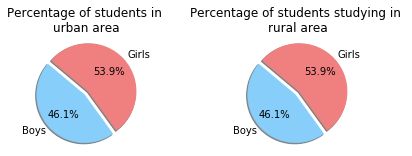

In [0]:
#Plot School Area characteristics

plt.figure()

##Urban
plt.subplot(2, 2, 1)
labels= 'Boys', 'Girls'
shares= [(round(s11_20192.query('stuSex == "M"')['schoolArea_cat_1'].count()/ \
                s11_20192['schoolArea_cat_1'].count()*100,2)),
         (round(s11_20192.query('stuSex == "F"')['schoolArea_cat_1'].count()/ \
                s11_20192['schoolArea_cat_1'].count()*100,2))]
colors = ['lightskyblue', 'lightcoral']
explode= (0.1,0)

plt.pie(shares,explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of students in \nurban area')
#plt.show()

##Rural
plt.subplot(2, 2, 2)
labels= 'Boys', 'Girls'
shares= [(round(s11_20192.query('stuSex == "M"')['schoolArea_cat_0'].count()/ \
                s11_20192['schoolArea_cat_0'].count()*100,2)),
         (round(s11_20192.query('stuSex == "F"')['schoolArea_cat_0'].count()/ \
                s11_20192['schoolArea_cat_0'].count()*100,2))]
colors = ['lightskyblue', 'lightcoral']
explode= (0.1,0)

plt.pie(shares,explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.axis('equal')
plt.title('Percentage of students studying in \nrural area')

plt.subplots_adjust(top=1, bottom=0, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.show()

In [0]:
#School funding
#dummies-> cat 0 = private
schfund_dummy =pd.get_dummies(s11_20192, columns=['schoolFunding_cat'])
s11_20192= pd.concat([s11_20192, schfund_dummy], axis=1)

#In case duplicate variables --> check for final version
s11_20192 = s11_20192.loc[:,~s11_20192.columns.duplicated()]

#Stats general
print('School Funding: \n')
#Public schools
print('Public schools: \n',
      'Proportion of students:',
      round(s11_20192.schoolFunding_cat_1.mean(),2), '\n',
      'Standard deviation:',
      round(s11_20192.schoolFunding_cat_1.std(),2), '\n')

#Private schools
print('Private schools: \n',
      'Proportion of students:',
      round(s11_20192.schoolFunding_cat_0.mean(),2), '\n',
      'Standard deviation:',
      round(s11_20192.schoolFunding_cat_0.std(),2), '\n')

#Stats per sex
print('\n')
print('School Funding per sex: \n')
#Public Schools
print('Public schools: \n',
      s11_20192.groupby('stuSex').agg({'schoolFunding_cat_1':['mean',
                                                              'std']}),'\n')

#Private Schools
print('Private schools: \n',
      s11_20192.groupby('stuSex').agg({'schoolFunding_cat_0':['mean','std']}))


School Funding: 

Public schools: 
 Proportion of students: 0.77 
 Standard deviation: 0.42 

Private schools: 
 Proportion of students: 0.23 
 Standard deviation: 0.42 



School Funding per sex: 

Public schools: 
        schoolFunding_cat_1          
                      mean       std
stuSex                              
F                 0.788213  0.408575
M                 0.751823  0.431956 

Private schools: 
        schoolFunding_cat_0          
                      mean       std
stuSex                              
F                 0.211787  0.408575
M                 0.248177  0.431956


### **BALANCE CHECK**

In previous chunks, we have shown a descriptive analysis of the sample based on the students' sex. In the following chunks, we follow the approach of Abadía and Bernal (2016), and we will find whether there exists a statically significant difference among boys and girls for each variable.

Thus, we first find this difference and second we perform a T-student test in which the null hypothesis is defined as no difference among groups. 

The results of the balance check, which can be seen in the next chunks, suggest:

a. Score Indexes: for all subjects, boys achieved a higher score than girls. This difference is statically significant for all cases given the low p-values. This confirms the existence and significance of a gender education gap. 

b. Control Variables: for all the control variables the difference between the proportion of students in each one is statically significant.


#### *Personal characteristics*

In [0]:
#Personal characteristics

print('T-test')
print('Personal Characteristics')
print('________________________________________________________________________________')

#Score Indexes
scoreIndexdf = pd.DataFrame(s11_20192,
                            columns= ['stuGlobalScore','readingScore',
                                      'mathScore', 'scienceScore'])

scoreIndex = ['stuGlobalScore', 'readingScore', 'mathScore', 'scienceScore']

rangescoresIndex = [scoreIndexdf.columns.get_loc(c) \
                    for c in scoreIndex if c in scoreIndexdf]
rangescoresIndex

difScore = {}
for i in scoreIndex:
  difScore[str(i)] = round(s11_20192[s11_20192['stuSex']=='M'][str(i)].mean() - \
                           s11_20192[s11_20192['stuSex']=='F'][str(i)].mean(),3)
  t, p = ttest_ind(s11_20192[s11_20192['stuSex']=='M'][str(i)],
                   s11_20192[s11_20192['stuSex']=='F'][str(i)],
                   equal_var=False)
  print(str(i),
        '\t\tDifference:',difScore[str(i)],'\t t = %g \t p = %g' % (t, p))
print('--------------------------------------------------------------------------------')

#Age
ageM=s11_20192[s11_20192['stuSex']== 'M']['stuAge']
ageF=s11_20192[s11_20192['stuSex']== 'F']['stuAge']
difAge = round(ageM.mean() - ageF.mean(),3)

t, p = ttest_ind(ageM, ageF, equal_var=False)
print('Age\t\t\tDifference:',difAge,'\t t = %g \t p = %g' % (t, p))
print('--------------------------------------------------------------------------------')

T-test
Personal Characteristics
________________________________________________________________________________
stuGlobalScore 		Difference: 7.89 	 t = 55.6446 	 p = 0
readingScore 		Difference: 0.449 	 t = 15.4665 	 p = 6.00708e-54
mathScore 		Difference: 3.411 	 t = 104.437 	 p = 0
scienceScore 		Difference: 1.978 	 t = 66.466 	 p = 0
--------------------------------------------------------------------------------
Age			Difference: 0.206 	 t = 66.9501 	 p = 0
--------------------------------------------------------------------------------


#### *Family characteristics*

In [0]:
#Family characteristics

print('T-test')
print('Family characteristics')
print('________________________________________________________________________________')

#Father education
difFEduc = {}
for i, j in zip(feduCat, educNames):
  difFEduc[str(i)] = round(s11_20192[s11_20192['stuSex']=='M'][str(i)].mean() - \
                           s11_20192[s11_20192['stuSex']=='F'][str(i)].mean(),3)
  t, p = ttest_ind(s11_20192[s11_20192['stuSex']=='M'][str(i)],
                   s11_20192[s11_20192['stuSex']=='F'][str(i)],
                   equal_var=False)
  print('Father '+str(j),
        '\t\tDifference:',difFEduc[str(i)],'\t t = %g \t p = %g' % (t, p))
print('--------------------------------------------------------------------------------')


#Mother Education
difMEduc = {}
for i, j in zip(meduCat, educNames):
  difMEduc[str(i)] = round(s11_20192[s11_20192['stuSex']=='M'][str(i)].mean() - \
                           s11_20192[s11_20192['stuSex']=='F'][str(i)].mean(),3)
  t, p = ttest_ind(s11_20192[s11_20192['stuSex']=='M'][str(i)],
                   s11_20192[s11_20192['stuSex']=='F'][str(i)],
                   equal_var=False)
  print('Mother '+str(j),
        '\t\tDifference:',difMEduc[str(i)],'\t t = %g \t p = %g' % (t, p))
print('--------------------------------------------------------------------------------')


#Stratum
difStrat = {}
for i in stratCat:
  difStrat[str(i)] = round(s11_20192[s11_20192['stuSex']=='M'][str(i)].mean() - \
                           s11_20192[s11_20192['stuSex']=='F'][str(i)].mean(),3)
  t, p = ttest_ind(s11_20192[s11_20192['stuSex']=='M'][str(i)],
                   s11_20192[s11_20192['stuSex']=='F'][str(i)],
                   equal_var=False)
  print('Stratum '+str(stratCatdf.columns.get_loc(str(i))+1),
        '\t\t\tDifference:',difStrat[str(i)],'\t t = %g \t p = %g' % (t, p))
print('--------------------------------------------------------------------------------')

T-test
Family characteristics
________________________________________________________________________________
Father No Education 		Difference: -0.001 	 t = -2.00849 	 p = 0.0445913
Father Primary Education 		Difference: -0.041 	 t = -32.6711 	 p = 7.00987e-234
Father Secondary Education 		Difference: 0.027 	 t = 20.0394 	 p = 2.70679e-89
Father Technical Education 		Difference: -0.003 	 t = -3.89897 	 p = 9.66145e-05
Father Undergraduate Education 		Difference: 0.011 	 t = 12.4821 	 p = 9.46564e-36
Father Postgraduate Education 		Difference: 0.003 	 t = 7.80571 	 p = 5.92845e-15
Father No answer 		Difference: 0.002 	 t = 3.36994 	 p = 0.000751913
--------------------------------------------------------------------------------
Mother No Education 		Difference: -0.001 	 t = -1.74935 	 p = 0.0802308
Mother Primary Education 		Difference: -0.039 	 t = -32.8153 	 p = 6.27956e-236
Mother Secondary Education 		Difference: 0.022 	 t = 15.9576 	 p = 2.60442e-57
Mother Technical Education 		Di

#### *School characteristics*

In [0]:
#School characteristics
print('T-test')
print('School characteristics')
print('________________________________________________________________________________')

#School Funding
sfundIndexdf = pd.DataFrame(s11_20192,
                            columns= ['schoolFunding_cat_0',
                                      'schoolFunding_cat_1'])

sfundIndex = ['schoolFunding_cat_0','schoolFunding_cat_1']

schoolfundingIndex = [sfundIndexdf.columns.get_loc(c) \
                      for c in sfundIndex if c in sfundIndexdf]
schoolfundingIndex

schFunNam = ['Private', 'Public']

difsfund = {}
for i, j in zip(sfundIndex, schFunNam):
  difsfund[str(i)] = round(s11_20192[s11_20192['stuSex']=='M'][str(i)].mean() - \
                           s11_20192[s11_20192['stuSex']=='F'][str(i)].mean(),3)
  t, p = ttest_ind(s11_20192[s11_20192['stuSex']=='M'][str(i)],
                   s11_20192[s11_20192['stuSex']=='F'][str(i)],
                   equal_var=False)
  print(str(j),
        '\t\tDifference:',difsfund[str(i)],'\t t = %g \t p = %g' % (t, p))
print('--------------------------------------------------------------------------------')  


#School area

sareaIndexdf = pd.DataFrame(s11_20192,
                            columns= ['schoolArea_cat_0','schoolArea_cat_1'])

sareaIndex = ['schoolArea_cat_0','schoolArea_cat_1']

schoolareaIndex = [sareaIndexdf.columns.get_loc(c)\
                   for c in sareaIndex if c in sareaIndexdf]
schoolareaIndex

schAreaNam = ['Rural', 'Urban']

difsarea = {}
for i, j in zip(sareaIndex, schAreaNam):
  difsarea[str(i)] = round(s11_20192[s11_20192['stuSex']=='M'][str(i)].mean() - \
                           s11_20192[s11_20192['stuSex']=='F'][str(i)].mean(),3)
  t, p = ttest_ind(s11_20192[s11_20192['stuSex']=='M'][str(i)],
                   s11_20192[s11_20192['stuSex']=='F'][str(i)],
                   equal_var=False)
  print(str(j),
        '\t\tDifference:',difsarea[str(i)],'\t t = %g \t p = %g' % (t, p))
print('--------------------------------------------------------------------------------')  

T-test
School characteristics
________________________________________________________________________________
Private 		Difference: 0.036 	 t = 30.9853 	 p = 1.3539e-210
Public 		Difference: -0.036 	 t = -30.9853 	 p = 1.3539e-210
--------------------------------------------------------------------------------
Rural 		Difference: 0.006 	 t = 5.7584 	 p = 8.49625e-09
Urban 		Difference: -0.006 	 t = -5.7584 	 p = 8.49625e-09
--------------------------------------------------------------------------------


### **KERNEL DISTRIBUTION**

As the final descriptive analysis, we find the distribution’s kernels of Global, Math, Science and Reading scores. We observe similarities in the right side of the distribution for the four scores. However, the distribution for the Global Score, Math and Science show that the girls kernel is shifted to the left compared to the boys one. This behaviour is more evident for the middle and high part of the distribution in said subjects, which may imply that the education score gaps increases as the scores get higher.

With regards to Reading, the distribution for both girls and boys shows no evident differences.

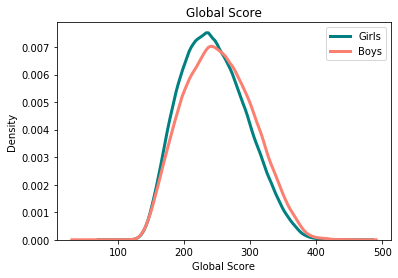

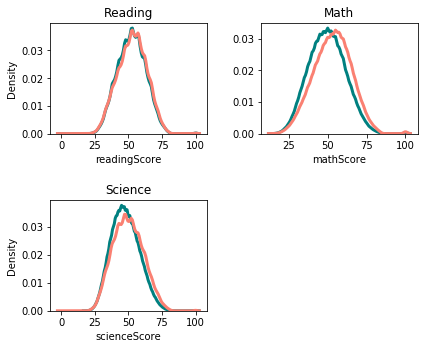

In [0]:
#Kernel distributions: global score, reading, math and science

#Global score
sns.distplot(s11_20192.query('stuSex== "F"')['stuGlobalScore'],hist = False,
             kde = True, kde_kws = {'linewidth': 3}, label='Girls', color = 'teal')
sns.distplot(s11_20192.query('stuSex== "M"')['stuGlobalScore'], hist = False,
             kde = True, kde_kws = {'linewidth': 3}, label='Boys', color = 'salmon')
plt.legend()
plt.xlabel('Global Score')
plt.ylabel('Density')
plt.title('Global Score')
plt.show()

#Reading
plt.figure()
plt.subplot(2, 2, 1)
sns.distplot(s11_20192.query('stuSex== "F"')['readingScore'], hist = False,
             kde = True, kde_kws = {'linewidth': 3}, color = 'teal')
sns.distplot(s11_20192.query('stuSex== "M"')['readingScore'], hist = False,
             kde = True, kde_kws = {'linewidth': 3}, color = 'salmon')
plt.ylabel('Density')
plt.title('Reading')


#Math
plt.subplot(2, 2, 2)
sns.distplot(s11_20192.query('stuSex== "F"')['mathScore'], hist = False,
             kde = True, kde_kws = {'linewidth': 3}, color = 'teal')
sns.distplot(s11_20192.query('stuSex== "M"')['mathScore'], hist = False,
             kde = True, kde_kws = {'linewidth': 3}, color = 'salmon')
plt.title('Math')


#Science
plt.subplot(2, 2, 3)
sns.distplot(s11_20192.query('stuSex== "F"')['scienceScore'], hist = False,
             kde = True, kde_kws = {'linewidth': 3}, color = 'teal')
sns.distplot(s11_20192.query('stuSex== "M"')['scienceScore'], hist = False,
             kde = True, kde_kws = {'linewidth': 3}, color = 'salmon')
plt.ylabel('Density')
plt.title('Science')
plt.subplots_adjust(top=1, bottom=0, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.show()

### **EDUCATION GAP**

The previous analysis suggests the existance of a gender gap in school performance among students in Colombia. Hence, the next step is to actually find this gap. To do so, we measured the difference in the average score between girls and boys.

We also wanted to explore other variations in our dataset. Thus, a stratum and a school area gender eduation gap were calculated. For these measures, we clustered the data per stratum and per school area, respectively.  

#### *Gender Education Gap* 

First we calculate the gap in education performance among boys and girls. It is found that the biggest gap exists on the Global Score followed by Math.  

Gender Education Gap (boys vs. girls): 
  
 Global Score Gap: 7.89 
 Reading Gap: 0.449 
 Math Gap: 3.411 
 Science Gap: 1.978


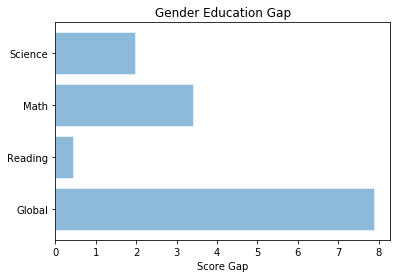

In [0]:
#Gender education gap
globalScoreGap = s11_20192[s11_20192['stuSex']== 'M']['stuGlobalScore'].mean() -\
                  s11_20192[s11_20192['stuSex']== 'F']['stuGlobalScore'].mean()
readingGap = s11_20192[s11_20192['stuSex']== 'M']['readingScore'].mean() - \
                  s11_20192[s11_20192['stuSex']== 'F']['readingScore'].mean()
mathGap = s11_20192[s11_20192['stuSex']== 'M']['mathScore'].mean() - \
                  s11_20192[s11_20192['stuSex']== 'F']['mathScore'].mean()
scienceGap = s11_20192[s11_20192['stuSex']== 'M']['scienceScore'].mean() - \
                  s11_20192[s11_20192['stuSex']== 'F']['scienceScore'].mean()

print('Gender Education Gap (boys vs. girls): \n ',
      '\n Global Score Gap:', round(globalScoreGap, 3),
      '\n Reading Gap:', round(readingGap,3),
      '\n Math Gap:', round(mathGap,3),
      '\n Science Gap:', round(scienceGap,3))

# Plot on gender education gap
objects = ('Global', 'Reading', 'Math', 'Science')
y_pos = np.arange(len(objects))
gaps = [globalScoreGap,readingGap,mathGap,scienceGap]

plt.barh(y_pos, gaps, align='center', alpha=0.5, edgecolor='white')
plt.yticks(y_pos, objects)
plt.xlabel('Score Gap')
plt.title('Gender Education Gap')

plt.show()

#### *Gender Education Gap per Stratum* 

As previously commented, the distribution of the socioeconomic stratification of Colombia is alarming. Such scenario made us wonder wheteher the gender education gap changes among boys and girls in different socioeconomic levels. We find that the largest gaps are found in the first and sixth stratums.  

Gender education gap per stratum (boys vs. girls): 

Stratum 1: 
 Global Score Gap: 8.294 
 Reading Gap: 0.455 
 Math Gap: 3.662 
 Science Gap: 2.148 

Stratum 2: 
 Global Score Gap: 6.805 
 Reading Gap: 0.186 
 Math Gap: 3.223 
 Science Gap: 1.816 

Stratum 3: 
 Global Score Gap: 4.983 
 Reading Gap: -0.013 
 Math Gap: 2.706 
 Science Gap: 1.405 

Stratum 4: 
 Global Score Gap: 0.66 
 Reading Gap: -0.649 
 Math Gap: 1.778 
 Science Gap: 0.534 

Stratum 5: 
 Global Score Gap: 4.093 
 Reading Gap: -0.101 
 Math Gap: 2.399 
 Science Gap: 1.036 

Stratum 6: 
 Global Score Gap: 9.415 
 Reading Gap: 1.06 
 Math Gap: 3.415 
 Science Gap: 1.715 



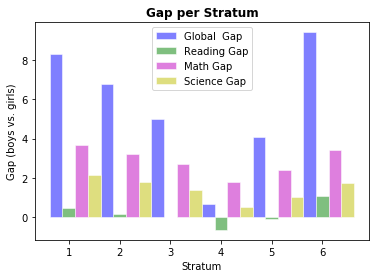

In [0]:
#Gender education gap per stratum

stratumGaps = {}

for i in rangeStratCat :
  stratumGaps['globalScoreGap_s{0}'.format(i+1)] = \
    s11_20192[(s11_20192['stuSex']== 'M') & (s11_20192['famHomeStratum']== 'Estrato '+str(i+1))]\
      ['stuGlobalScore'].mean() - \
    s11_20192[(s11_20192['stuSex']== 'F')& (s11_20192['famHomeStratum']== 'Estrato '+str(i+1))]\
      ['stuGlobalScore'].mean()
  
  stratumGaps['readingGap_s{0}'.format(i+1)] = \
    s11_20192[(s11_20192['stuSex']== 'M') & (s11_20192['famHomeStratum']== 'Estrato '+str(i+1))]\
      ['readingScore'].mean() - \
    s11_20192[(s11_20192['stuSex']== 'F')& (s11_20192['famHomeStratum']== 'Estrato '+str(i+1))]\
      ['readingScore'].mean()
  
  stratumGaps['mathGap_s{0}'.format(i+1)] = \
    s11_20192[(s11_20192['stuSex']== 'M') & (s11_20192['famHomeStratum']== 'Estrato '+str(i+1))]\
      ['mathScore'].mean() - \
    s11_20192[(s11_20192['stuSex']== 'F')& (s11_20192['famHomeStratum']== 'Estrato '+str(i+1))]\
      ['mathScore'].mean()
  
  stratumGaps['scienceGap_s{0}'.format(i+1)] = \
    s11_20192[(s11_20192['stuSex']== 'M') & (s11_20192['famHomeStratum']== 'Estrato '+str(i+1))]\
      ['scienceScore'].mean() - \
    s11_20192[(s11_20192['stuSex']== 'F')& (s11_20192['famHomeStratum']== 'Estrato '+str(i+1))]\
      ['scienceScore'].mean()

print('Gender education gap per stratum (boys vs. girls): \n')
for i in range(0,6):
  print('Stratum '+str(i+1)+':',
        '\n Global Score Gap:', round(stratumGaps['globalScoreGap_s'+str(i+1)],3),
        '\n Reading Gap:', round(stratumGaps['readingGap_s'+str(i+1)],3),
        '\n Math Gap:', round(stratumGaps['mathGap_s'+str(i+1)],3),
        '\n Science Gap:', round(stratumGaps['scienceGap_s'+str(i+1)],3), '\n')
  

#Plot gender education gap per stratum
#Data to plot
barWidth= 0.25

results_glob =(stratumGaps['globalScoreGap_s1'], stratumGaps['globalScoreGap_s2'],
               stratumGaps['globalScoreGap_s3'], stratumGaps['globalScoreGap_s4'],
               stratumGaps['globalScoreGap_s5'], stratumGaps['globalScoreGap_s6']) 
results_read = (stratumGaps['readingGap_s1'], stratumGaps['readingGap_s2'],
                stratumGaps['readingGap_s3'], stratumGaps['readingGap_s4'],
                stratumGaps['readingGap_s5'], stratumGaps['readingGap_s6'])
results_math = (stratumGaps['mathGap_s1'], stratumGaps['mathGap_s2'],
                stratumGaps['mathGap_s3'], stratumGaps['mathGap_s4'],
                stratumGaps['mathGap_s5'], stratumGaps['mathGap_s6'])
results_science = (stratumGaps['scienceGap_s1'], stratumGaps['scienceGap_s2'],
                   stratumGaps['scienceGap_s3'], stratumGaps['scienceGap_s4'],
                   stratumGaps['scienceGap_s5'], stratumGaps['scienceGap_s6'])

r1= np.arange(len(results_glob))
r2=[x+ barWidth for x in r1]
r3= [x+ barWidth for x in r2]
r4=[x+barWidth for x in r3]

plt.bar(r1,results_glob,color='b',width=barWidth, edgecolor='white',
        align='center', alpha=0.5, label= 'Global  Gap')
plt.bar(r2,results_read,color='g',width=barWidth, edgecolor='white',
        align='center', alpha=0.5, label= 'Reading Gap')
plt.bar(r3,results_math,color='m',width=barWidth, edgecolor='white',
        align='center',alpha=0.5, label= 'Math Gap')
plt.bar(r4,results_science,color='y',width=barWidth, edgecolor='white',
        align='center',alpha=0.5, label= 'Science Gap')

#Label
plt.xlabel('Stratum')
plt.xticks([r + barWidth for r in range(len(results_glob))], ['1', '2', '3', '4', '5', '6'])
plt.ylabel('Gap (boys vs. girls)')
plt.title('Gap per Stratum', fontweight='bold')
 
# Create legend & Show graphic
plt.legend()
plt.show()

#### *Gender Education Gap per School Area* 

Next, we also explore whether the gap varies depending on where the school is located. We find that all gaps are larger in urban areas than in rural ones.

Gender education gap per school area (boys vs. girls): 

Rural area: 
 Global Score Gap: 6.218 
 Reading Gap: 0.182 
 Math Gap: 3.08 
 Science Gap: 1.684 

Urban area: 
 Global Score Gap: 8.373 
 Reading Gap: 0.533 
 Math Gap: 3.507 
 Science Gap: 2.062 



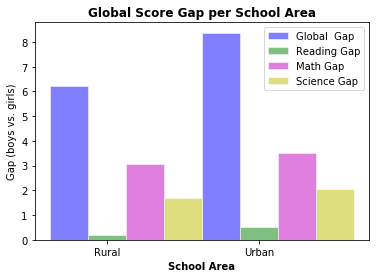

In [0]:
#Gap rural
globalScoreGap_rural = \
  s11_20192[(s11_20192['stuSex']== 'M') & (s11_20192['schoolArea']== 'RURAL')]\
    ['stuGlobalScore'].mean() - \
  s11_20192[(s11_20192['stuSex']== 'F') & (s11_20192['schoolArea']== 'RURAL')]\
    ['stuGlobalScore'].mean()

readingGap_rural = \
  s11_20192[(s11_20192['stuSex']== 'M') & (s11_20192['schoolArea']== 'RURAL')]\
    ['readingScore'].mean() - \
  s11_20192[(s11_20192['stuSex']== 'F') & (s11_20192['schoolArea']== 'RURAL')]\
    ['readingScore'].mean()

mathGap_rural = \
  s11_20192[(s11_20192['stuSex']== 'M') & (s11_20192['schoolArea']== 'RURAL')]\
    ['mathScore'].mean() - \
  s11_20192[(s11_20192['stuSex']== 'F') & (s11_20192['schoolArea']== 'RURAL')]\
    ['mathScore'].mean()

scienceGap_rural = \
  s11_20192[(s11_20192['stuSex']== 'M') & (s11_20192['schoolArea']== 'RURAL')]\
    ['scienceScore'].mean() - \
  s11_20192[(s11_20192['stuSex']== 'F') & (s11_20192['schoolArea']== 'RURAL')]\
    ['scienceScore'].mean()

#Gap urban
globalScoreGap_urban = \
  s11_20192[(s11_20192['stuSex']== 'M') & (s11_20192['schoolArea']== 'URBANO')]\
    ['stuGlobalScore'].mean() - \
  s11_20192[(s11_20192['stuSex']== 'F') & (s11_20192['schoolArea']== 'URBANO')]\
    ['stuGlobalScore'].mean()

readingGap_urban = \
  s11_20192[(s11_20192['stuSex']== 'M') & (s11_20192['schoolArea']== 'URBANO')]\
    ['readingScore'].mean() - \
  s11_20192[(s11_20192['stuSex']== 'F') & (s11_20192['schoolArea']== 'URBANO')]\
    ['readingScore'].mean()

mathGap_urban = \
  s11_20192[(s11_20192['stuSex']== 'M') & (s11_20192['schoolArea']== 'URBANO')]\
    ['mathScore'].mean() - \
  s11_20192[(s11_20192['stuSex']== 'F') & (s11_20192['schoolArea']== 'URBANO')]\
    ['mathScore'].mean()

scienceGap_urban = \
  s11_20192[(s11_20192['stuSex']== 'M') & (s11_20192['schoolArea']== 'URBANO')]\
    ['scienceScore'].mean() - \
  s11_20192[(s11_20192['stuSex']== 'F') & (s11_20192['schoolArea']== 'URBANO')]\
    ['scienceScore'].mean()

print('Gender education gap per school area (boys vs. girls): \n')
print('Rural area:',
      '\n Global Score Gap:', round(globalScoreGap_rural, 3),
      '\n Reading Gap:', round(readingGap_rural,3),
      '\n Math Gap:', round(mathGap_rural,3),
      '\n Science Gap:', round(scienceGap_rural,3), '\n')

print('Urban area:',
      '\n Global Score Gap:', round(globalScoreGap_urban, 3),
      '\n Reading Gap:', round(readingGap_urban,3),
      '\n Math Gap:', round(mathGap_urban,3),
      '\n Science Gap:', round(scienceGap_urban,3), '\n')

#Data to plot
barWidth= 0.25

results_glob1 =(globalScoreGap_rural,globalScoreGap_urban)
results_read1 = (readingGap_rural ,readingGap_urban)
results_math1 = (mathGap_rural,mathGap_urban)
results_science1 = (scienceGap_rural,scienceGap_urban)

r11= np.arange(len(results_glob1))
r22=[x+ barWidth for x in r11]
r33= [x+ barWidth for x in r22]
r44=[x+barWidth for x in r33]

plt.bar(r11,results_glob1,color='b',width=barWidth, edgecolor='white', alpha=0.5, label= 'Global  Gap')
plt.bar(r22,results_read1,color='g',width=barWidth, edgecolor='white',alpha=0.5, label= 'Reading Gap')
plt.bar(r33,results_math1,color='m',width=barWidth, edgecolor='white',alpha=0.5, label= 'Math Gap')
plt.bar(r44,results_science1,color='y',width=barWidth, edgecolor='white',alpha=0.5, label= 'Science Gap')


#Label
plt.xlabel('School Area', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(results_glob1))], ['Rural', 'Urban'])
plt.ylabel('Gap (boys vs. girls)')
plt.title('Global Score Gap per School Area', fontweight='bold')
 
# Create legend & Show graphic
plt.legend()
plt.show()



### **REGRESSION ANALYSIS**
Finally, the regression analysis will check for a significant relation between the students' sex and his/her score. The regression equation is formulated as follows: 

$ Score_{i} = \beta_{0}+ \beta_1Gender_{i} + \beta_{2} \overline{P}_{i} + \beta_{3} \overline{F}_{i} +\beta_{4}\overline{S}_{i} + \epsilon_{i} $

Starting from the LHS of the equation, $ Score_{i}$ stands as the student's score on each of the four subjects that are part of the present analysis. Jumping into the RHS of the equation we define $Gender$ as the student's sex. $ \beta_{1} $ shows the gap in scores between boys and girls with similar observable characterisitcs. Hence, it is the parameter of interest of study. $ \overline{P}_{i} $, $ \overline{F}_{i} $ and $ \overline{S}_{i} $ are vectors gathering student's personal, familiar and scholar characteristics, respectively. They serve as control variables for the study. Finally, $ \epsilon_{i} $ is the error term.

In order to confirm our previous analysis and to find a gender education gap in favour of boys, we expect $ \beta_{1} $ to be positive and significant. This is due to the bicategorical condition of $Gender$ and the inclusion of the Male category in the regression. 


#### *OLS Regression*

The OLS regression allows us to study the average gender gap for the sample of study. In the following we show its results.

For all specifications, $\beta_{1}$ is positive and significant at 1% level. Taken as example the Math score, it is found that boys scored on average 3.7 points more than girls with similar observable characteristics. As the descriptive analysis showed, the biggest gap is found at the Global Score with a difference of 8.7 points meanwhile the smallest is at Reading score with a gap of 0.55 points. 

With regards to controls, they are all significant at 1% level across all specifications and is most of the cases they count with the expected signs. Higher levels of parent’s education and higher socioeconomic stratums are related with higher scores. At the same time students living in urban areas or attending to private schools are expected to score higher results than students in rural areas or public schools. However, given the multiple categorical nature of the data no further implications can be derived from it. 


In [0]:
#Create square of age
s11_20192['stuAge_sq']=s11_20192['stuAge']**2

#OLS regression
print('==================================================================================================')
print('Global Score')
print('==================================================================================================')
ols_1 =smf.ols('stuGlobalScore ~C(stuSex)+stuAge+stuAge_sq+\
                C(schoolArea)+C(schoolFunding)+C(famHomeStratum)+\
                F_Primary+F_Secondary+F_Technical+F_Undergraduate+F_Postgraduate+F_NoAnswer+\
                M_Primary+M_Secondary+M_Technical+M_Undergraduate+M_Postgraduate+M_NoAnswer',
               data=s11_20192).fit()
print(ols_1.summary())

print('\n\n')
print('==================================================================================================')
print('Reading Score')
print('==================================================================================================')
ols_2 =smf.ols('readingScore ~C(stuSex)+stuAge+stuAge_sq+\
                C(schoolArea)+C(schoolFunding)+C(famHomeStratum)+\
                F_Primary+F_Secondary+F_Technical+F_Undergraduate+F_Postgraduate+F_NoAnswer+\
                M_Primary+M_Secondary+M_Technical+M_Undergraduate+M_Postgraduate+M_NoAnswer',
               data=s11_20192).fit()
print(ols_2.summary())
print('\n\n')
print('==================================================================================================')
print('Math Score')
print('==================================================================================================')

ols_3 =smf.ols('mathScore ~C(stuSex)+stuAge+stuAge_sq+\
                C(schoolArea)+C(schoolFunding)+C(famHomeStratum)+\
                F_Primary+F_Secondary+F_Technical+F_Undergraduate+F_Postgraduate+F_NoAnswer+\
                M_Primary+M_Secondary+M_Technical+M_Undergraduate+M_Postgraduate+M_NoAnswer',
               data=s11_20192).fit()
print(ols_3.summary())  

print('\n\n')
print('==================================================================================================')
print('Science Score')
print('==================================================================================================')

ols_4 =smf.ols('scienceScore ~C(stuSex)+stuAge+stuAge_sq+\
                C(schoolArea)+C(schoolFunding)+C(famHomeStratum)+\
                F_Primary+F_Secondary+F_Technical+F_Undergraduate+F_Postgraduate+F_NoAnswer+\
                M_Primary+M_Secondary+M_Technical+M_Undergraduate+M_Postgraduate+M_NoAnswer',
               data=s11_20192).fit()
print(ols_4.summary())  


As a final step, we wanted to find the size effect of $\beta_{1}$ in each one of the specifications. The results show a small size effect of the $Gender$ variable for every subject score.

In [0]:
#Size of effect

print('Gender size effect - OLS:')
print('---------------------------')
#Global Score
ols1_beta = pd.read_html(ols_1.summary().tables[1].as_html(),header=0,index_col=0)[0]
b1=ols1_beta['coef'].values[1]
b1 = b1.astype('float')
print('Global Score:\t',round(b1/s11_20192['stuGlobalScore'].mean(),2))

#Reading
ols1_beta = pd.read_html(ols_2.summary().tables[1].as_html(),header=0,index_col=0)[0]
b1=ols1_beta['coef'].values[1]
b1 = b1.astype('float')
print('Reading Score:\t',round(b1/s11_20192['readingScore'].mean(),2))

#Math
ols1_beta = pd.read_html(ols_3.summary().tables[1].as_html(),header=0,index_col=0)[0]
b1=ols1_beta['coef'].values[1]
b1 = b1.astype('float')
print('Math Score:\t',round(b1/s11_20192['mathScore'].mean(),2))

#Science
ols1_beta = pd.read_html(ols_4.summary().tables[1].as_html(),header=0,index_col=0)[0]
b1=ols1_beta['coef'].values[1]
b1 = b1.astype('float')
print('Science Score:\t',round(b1/s11_20192['scienceScore'].mean(),2))



Gender size effect - OLS:
---------------------------
Global Score:	 0.04
Reading Score:	 0.01
Math Score:	 0.07
Science Score:	 0.04


#### *Quantile Regression*
The quantile regression allows us to study the gender gap across different quantiles of the score distribution. More specifically, it shows the impact of gender on scores at different points of its conditional distribution. In comparison with an OLS approach, it provides a more robust estimator in case of observations far away from the distribution which are usual in large datasets as the present (Abadía and Bernal, 2016).

In our case of study, we have only included Global Score as a regressor and we have chosen the 20th, 40th, 60th, 80th and 95th quantiles for the analysis. 

Looking at the results, similar conclusions are derived as in the OLS regression: gender’s estimator is positive and significant at all points of the distribution and controls remain significant and with the same signs. However, the size of the effect i.e. the gender gap increases with the quantiles. 


In [0]:
#QUANTILE REGRESSION
print('==================================================================================================')
print('Quantil 20')
print('==================================================================================================')
q20_1= smf.quantreg('stuGlobalScore ~C(stuSex)+stuAge+stuAge_sq+\
                    C(schoolArea)+C(schoolFunding)+C(famHomeStratum)+\
                    F_Primary+F_Secondary+F_Technical+F_Undergraduate+F_Postgraduate+F_NoAnswer+\
                    M_Primary+M_Secondary+M_Technical+M_Undergraduate+M_Postgraduate+M_NoAnswer',
                    data=s11_20192)
res_q201 = q20_1.fit(q=.2)
print(res_q201.summary())

print('\n\n')
print('==================================================================================================')
print('Quantil 40')
print('==================================================================================================')
q40_1= smf.quantreg('stuGlobalScore ~C(stuSex)+stuAge+stuAge_sq+\
                    C(schoolArea)+C(schoolFunding)+C(famHomeStratum)+\
                    F_Primary+F_Secondary+F_Technical+F_Undergraduate+F_Postgraduate+F_NoAnswer+\
                    M_Primary+M_Secondary+M_Technical+M_Undergraduate+M_Postgraduate+M_NoAnswer',
                    data=s11_20192)
res_q401 = q40_1.fit(q=.4)
print(res_q401.summary())

print('\n\n')
print('==================================================================================================')
print('Quantil 60')
print('==================================================================================================')
q60_1= smf.quantreg('stuGlobalScore ~C(stuSex)+stuAge+stuAge_sq+\
                    C(schoolArea)+C(schoolFunding)+C(famHomeStratum)+\
                    F_Primary+F_Secondary+F_Technical+F_Undergraduate+F_Postgraduate+F_NoAnswer+\
                    M_Primary+M_Secondary+M_Technical+M_Undergraduate+M_Postgraduate+M_NoAnswer', 
                    data=s11_20192)
res_q601 = q60_1.fit(q=.6)
print(res_q601.summary())

print('\n\n')
print('==================================================================================================')
print('Quantil 80')
print('==================================================================================================')
q80_1= smf.quantreg('stuGlobalScore ~C(stuSex)+stuAge+stuAge_sq+\
                    C(schoolArea)+C(schoolFunding)+C(famHomeStratum)+\
                    F_Primary+F_Secondary+F_Technical+F_Undergraduate+F_Postgraduate+F_NoAnswer+\
                    M_Primary+M_Secondary+M_Technical+M_Undergraduate+M_Postgraduate+M_NoAnswer',
                    data=s11_20192)
res_q801 = q80_1.fit(q=.8)
print(res_q801.summary())

print('\n\n')
print('==================================================================================================')
print('Quantil 95')
print('==================================================================================================')
q95_1= smf.quantreg('stuGlobalScore ~C(stuSex)+stuAge+stuAge_sq+\
                    C(schoolArea)+C(schoolFunding)+C(famHomeStratum)+\
                    F_Primary+F_Secondary+F_Technical+F_Undergraduate+F_Postgraduate+F_NoAnswer+\
                    M_Primary+M_Secondary+M_Technical+M_Undergraduate+M_Postgraduate+M_NoAnswer',
                    data=s11_20192)
res_q951 = q95_1.fit(q=.95)
print(res_q951.summary())

                         QuantReg Regression Results                          
Dep. Variable:         stuGlobalScore   Pseudo R-squared:               0.1003
Model:                       QuantReg   Bandwidth:                       2.481
Method:                 Least Squares   Sparsity:                        151.6
Date:                Wed, 15 Jan 2020   No. Observations:               472570
Time:                        13:14:29   Df Residuals:                   472547
                                        Df Model:                           22
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        321.4054     16.179     19.865      0.000     289.695     353.116
C(stuSex)[T.M]                     5.8919      0.179     32.944      0.000       5.541       6.242
C(schoolArea)[T.URBANO]           10.3243      0.26

# Discussion and conclusion

Colombian education system has recently taken a new challenge: to turn Colombia into the best educated country all along Latin America. The present study has questioned its progress and had a look at gender differences at school level performance. Previous studies (Abadia and Bernal, 2016) already found disparities among boys and girls at older cohorts. Thus, we wonder whether they could be still identified nowadays.  

Unfortunately, a gender gap in school performance has been found across four different scores in Saber 11 results. Additionally, socioeconomic, familiar and scholar characteristics have been found to explain part of this variation. We have also found that the gap increases the further we look into score’s distribution, suggesting that girls are more affected from gender inequalities.

However, in the development of this project some flaws are identified as regressions might suffer from multicollinearity problems.



# Bibliography

Abadía, L. K., & Bernal, G. (2017). ¿ Una brecha que se amplía? Un análisis de la brecha de género en las pruebas de salida del colegio en Colombia. Revista de Economía del Rosario, 20(1), 28.

Hanushek, E. A. (1979). Conceptual and empirical issues in the estimation of educational production functions. Journal of human Resources, 351-388.

Icfes (2019). Guía de orientación Saber 11º 2019-2 [PDF File]. Retrieved from: https://www.icfes.gov.co/documents/20143/193560/Guia+de+orientacion+de+saber+11-2019+-+2.pdf/8e305a8c-61fb-411e-4a2d-1fc4abe1f520